In [1]:
import numpy as np

h = [2,1,0]
x = [3,4,5]

y = np.convolve(x,h)
y

array([ 6, 11, 14,  5,  0])

In [2]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0],y[1],y[2],y[3],y[4]))

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


In [2]:
import numpy as np

x= [6,2]
h= [1,2,5,4]

y= np.convolve(x,h,"full") #now, because of the zero padding, the final dimension of the array is bigger
y

array([ 6, 14, 34, 34,  8])

In [3]:
import numpy as np

x= [6,2]
h= [1,2,5,4]

y= np.convolve(x,h,"same") #it is same as zero padding, but withgenerates same
y

array([ 6, 14, 34, 34])

In [4]:
import numpy as np

x= [6,2]
h= [1,2,5,4]

y= np.convolve(x,h,"valid") #we will understand why we used the argument valid in the next example
y

array([14, 34, 34])

In [5]:
from scipy import signal as sg

I= [[255, 7, 3],
    [212, 240, 4],
    [218, 216, 230],]

g= [[-1,1]]

print ('Without zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements
# that do not reply on the zero-padding.

print ('With zero padding \n')
print (sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [6]:
from scipy import signal as sg

I= [[255, 7, 3],
    [212, 240, 4],
    [218, 216, 230],]

g= [[-1, 1],
    [ 2, 3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs.
# It will use zero to complete the input matrix.

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs.
# It will use zero to complete the input matrix.

print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements
# that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


In [7]:
import tensorflow as tf

# Building graph

input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

# Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 0.15183137]
   [-1.2147546 ]
   [ 2.1148872 ]
   [-0.68735707]
   [ 0.90399367]
   [ 0.19781844]
   [ 1.5158734 ]
   [ 0.10154022]
   [ 2.521364  ]
   [ 0.30977857]]

  [[ 1.8457316 ]
   [-1.2491025 ]
   [-0.32984376]
   [-2.0555794 ]
   [-1.2836386 ]
   [ 0.3641166 ]
   [-0.02726984]
   [-0.34672388]
   [ 0.67685276]
   [ 1.2838494 ]]

  [[-0.35909513]
   [ 1.8259853 ]
   [-0.36452165]
   [ 1.3755312 ]
   [-1.2716378 ]
   [-1.5140952 ]
   [-1.4205512 ]
   [ 0.4943766 ]
   [-0.02677097]
   [ 0.6039299 ]]

  [[ 0.6958604 ]
   [-0.10477969]
   [ 0.24949567]
   [ 1.0366611 ]
   [ 1.5517309 ]
   [ 0.21577501]
   [ 0.2458654 ]
   [ 0.14289646]
   [-0.5068866 ]
   [ 0.48978853]]

  [[ 0.949605  ]
   [-1.3245763 ]
   [-0.32576656]
   [-0.85303175]
   [ 1.4572427 ]
   [ 0.766938  ]
   [-1.6305836 ]
   [-1.2139064 ]
   [ 0.88246095]
   [ 0.04088348]]

  [[ 0.1692438 ]
   [-0.02562637]
   [-0.07876696]
   [-0.3902622 ]
   [ 0.46879563]
   [-0.09440875]
   [-1.0943391 ]
   [ 2.486903

In [11]:
# Download image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7F109419CCF8> 


After conversion to numerical representation: 

 array([[ 64,  71,  64, ...,  49,  47,  48],
       [ 68,  71,  63, ...,  53,  52,  51],
       [ 65,  69,  65, ...,  54,  50,  55],
       ...,
       [ 21,  23,  22, ..., 183, 169, 154],
       [ 17,  20,  25, ..., 179, 165, 152],
       [ 26,  22,  20, ..., 170, 159, 149]], dtype=uint8)

 Input image converted to gray scale: 



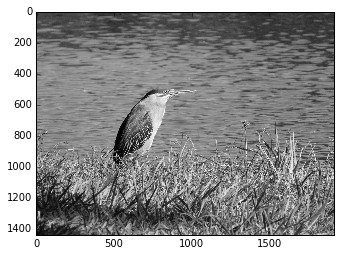

In [12]:
# Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg') # My image's name

# Uses the ITU-R 601-2 Luma transform (there are several
# ways to convert an image to grey scale).

image_gr = im.convert("L")
print("\n Original type: %r \n\n" % image_gr)

# Convert image to matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)
### Activating matplotlib for Ipython
%matplotlib inline

# Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray') # Possible to experiment with different color maps(greys, winter, autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


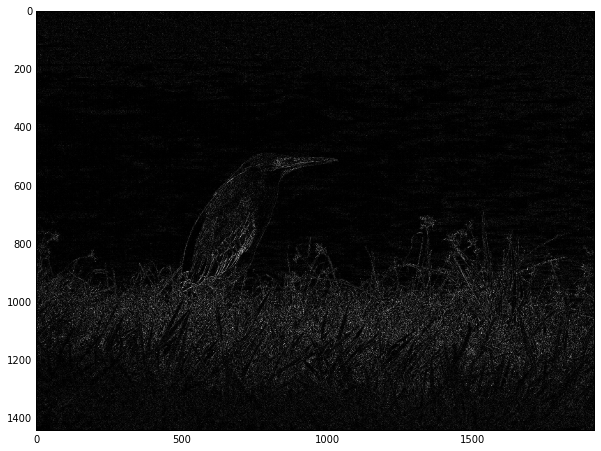

In [14]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                       ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

GRADIENT MAGNITUDE - Feature map


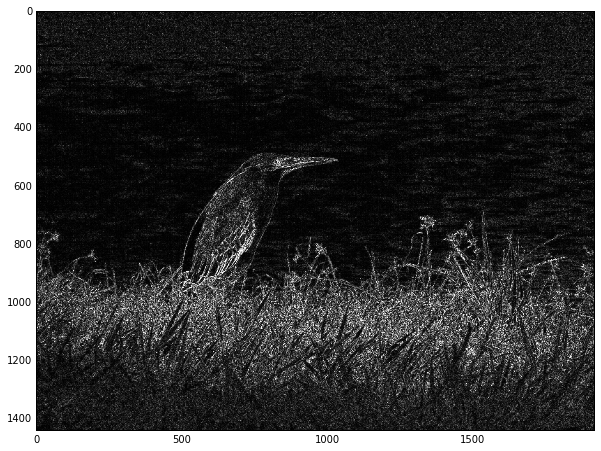

In [15]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')